In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

In [4]:
# Reading data from remote link
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")

#printing first 5 rows
df.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

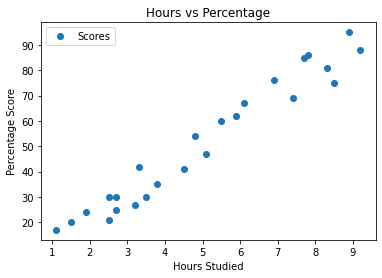

In [6]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [7]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,1].values

print('X_arr shape: ', X.shape)
print('Y_arr shape: ', Y.shape)

X_arr shape:  (25, 1)
Y_arr shape:  (25,)


In [8]:
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size = 0.2, shuffle = True, random_state=0)

print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_val.shape)
print('y_test shape: ', y_val.shape)

X_train shape:  (20, 1)
y_train shape:  (20,)
X_test shape:  (5, 1)
y_test shape:  (5,)


In [9]:
RFmodel = RandomForestRegressor(n_estimators=10 ,random_state=0)
RFmodel.fit(X_train,y_train)
print("Training complete.")

Training complete.


In [11]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = RFmodel.estimators_[4]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = list((df.iloc[:,:-1]).columns), rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

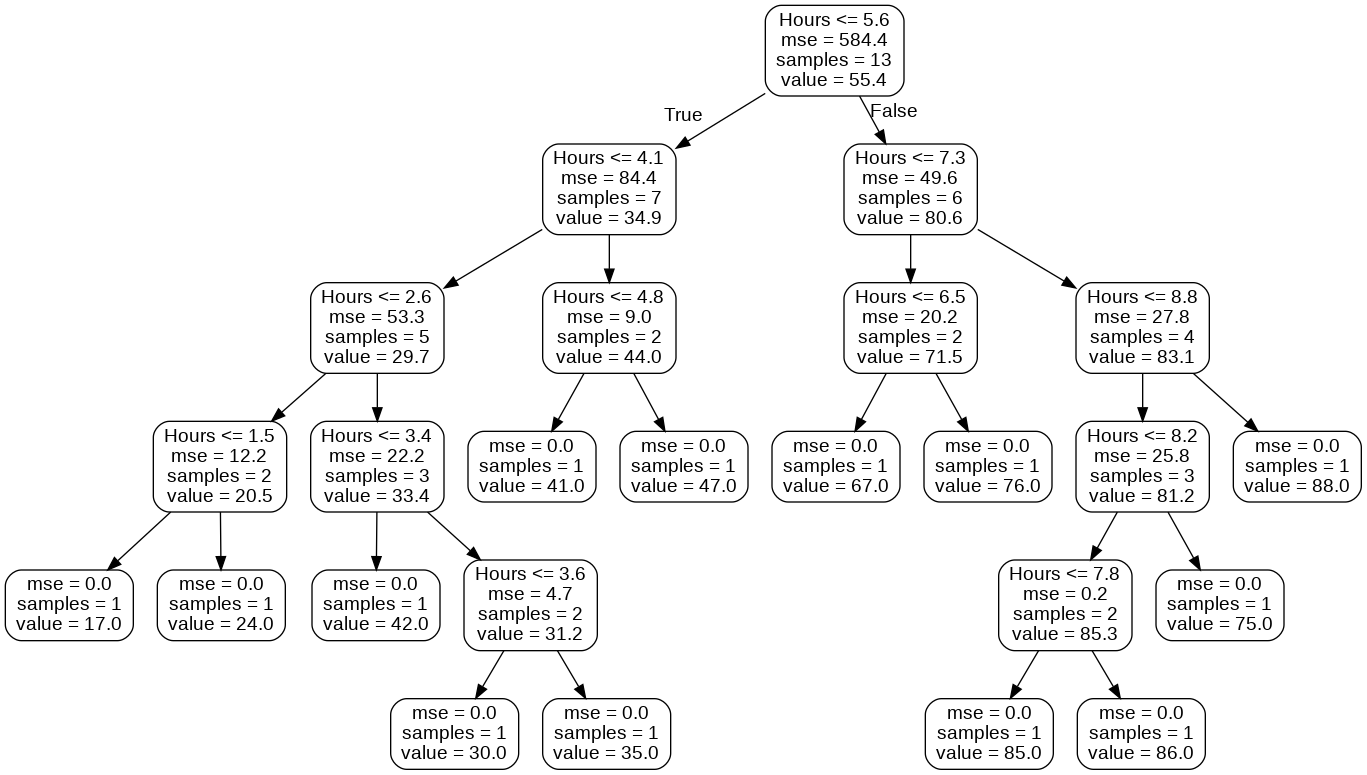

In [12]:
from IPython.display import Image
Image(filename='tree.png')

In [14]:
#comparing the validation set predictions with the actual values
RF_Prediction = RFmodel.predict(X_val)
X1 = X_val.flatten()
df = pd.DataFrame({'Hours':X1,'Actual': y_val, 'Predicted': RF_Prediction})  
df

,Hours,Actual,Predicted
0,1.5,20,19.7
1,3.2,27,38.4
2,7.4,69,84.3
3,2.5,30,23.0
4,5.9,62,66.5


In [20]:
print('Training Accuracy:',(100*RFmodel.score(X_train, y_train)).round(2),'%')
print('Validation Accuracy',(100*RFmodel.score(X_val, y_val)).round(2),'%')
MAE2=mean_absolute_error(RF_Prediction,y_val)
print("Mean Absolute error in Model:", MAE2)

Training Accuracy: 98.66 %
Validation Accuracy 78.12 %
Mean Absolute error in Model: 7.7
